In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [103]:
data = pd.read_csv(r'dirty_data/dirty_cafe_sales.csv')

In [104]:
data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [105]:
# Column Renaming :
data.columns = ['Trans_id','Item','Quantity','Price_per_unit','Total_spent','Payment_method','Location','Trans_date']

In [106]:
data.head()

,Trans_id,Item,Quantity,Price_per_unit,Total_spent,Payment_method,Location,Trans_date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [107]:
data = data.drop(columns=['Trans_id'])

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Item            9667 non-null   object
 1   Quantity        9862 non-null   object
 2   Price_per_unit  9821 non-null   object
 3   Total_spent     9827 non-null   object
 4   Payment_method  7421 non-null   object
 5   Location        6735 non-null   object
 6   Trans_date      9841 non-null   object
dtypes: object(7)
memory usage: 547.0+ KB


In [109]:
# Data Missing Order : Location > Payment_method > Item > Price_per_unit > Trans_date > Quantity  

In [110]:
data[data.Payment_method.isnull()]

,Item,Quantity,Price_per_unit,Total_spent,Payment_method,Location,Trans_date
8,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31
13,Cookie,5,1.0,5.0,NaN,Takeaway,2023-06-01
14,ERROR,2,1.5,3.0,NaN,In-store,2023-03-21
16,Sandwich,1,4.0,4.0,NaN,NaN,2023-06-10
...,...,...,...,...,...,...,...
9978,Tea,3,1.5,4.5,NaN,NaN,2023-02-16
9982,Cookie,2,1.0,2.0,NaN,Takeaway,2023-12-30
9985,Cake,2,3.0,6.0,NaN,UNKNOWN,2023-01-03
9994,UNKNOWN,4,4.0,16.0,NaN,NaN,2023-01-08


In [111]:
data.Payment_method

0          Credit Card
1                 Cash
2          Credit Card
3              UNKNOWN
4       Digital Wallet
             ...      
9995               NaN
9996    Digital Wallet
9997    Digital Wallet
9998    Digital Wallet
9999              Cash
Name: Payment_method, Length: 10000, dtype: object

In [112]:
data[data.Location == 'In-store']

,Item,Quantity,Price_per_unit,Total_spent,Payment_method,Location,Trans_date
1,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
4,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
9,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31
12,Sandwich,2,4.0,8.0,Cash,In-store,2023-05-03
...,...,...,...,...,...,...,...
9977,Juice,2,3.0,ERROR,Digital Wallet,In-store,2023-11-04
9979,Smoothie,5,4.0,20.0,Cash,In-store,2023-07-20
9986,Sandwich,2,4.0,8.0,Credit Card,In-store,2023-12-14
9992,Smoothie,4,4.0,16.0,UNKNOWN,In-store,2023-07-05


In [113]:
print("{}% of data available".format((data['Payment_method'].value_counts().sum()/len(data.Payment_method))*100))
print("{}% of data missing".format(round(data.Payment_method.isnull().mean()*100))) #around 26% data missing,can't replace the missing values with mode

74.21% of data available
26% of data missing


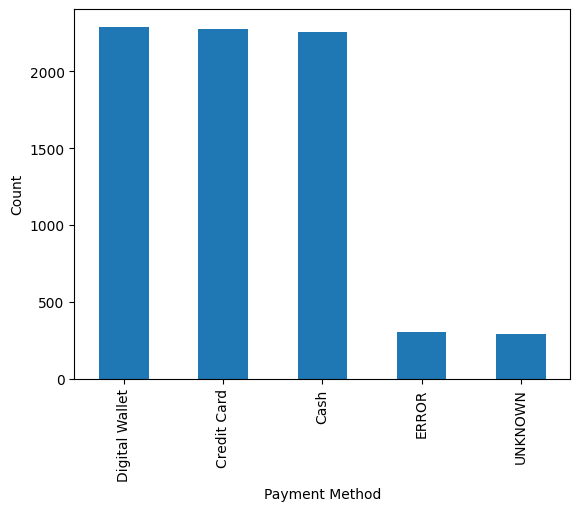

In [114]:
data.Payment_method.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

In [115]:
data[data.Payment_method == 'UNKNOWN']

,Item,Quantity,Price_per_unit,Total_spent,Payment_method,Location,Trans_date
3,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
25,Smoothie,3,4.0,NaN,UNKNOWN,UNKNOWN,2023-12-13
120,Cake,2,3.0,6.0,UNKNOWN,NaN,2023-06-02
145,Tea,5,1.5,7.5,UNKNOWN,In-store,2023-09-03
181,Smoothie,3,4.0,12.0,UNKNOWN,Takeaway,2023-03-26
...,...,...,...,...,...,...,...
9863,Cake,4,3.0,12.0,UNKNOWN,NaN,2023-10-06
9872,Cake,5,3.0,15.0,UNKNOWN,UNKNOWN,2023-11-26
9972,Cake,4,3.0,12.0,UNKNOWN,In-store,2023-08-06
9980,Tea,4,1.5,6.0,UNKNOWN,NaN,2023-08-24


In [116]:
data.Payment_method.fillna('Missing',inplace=True)

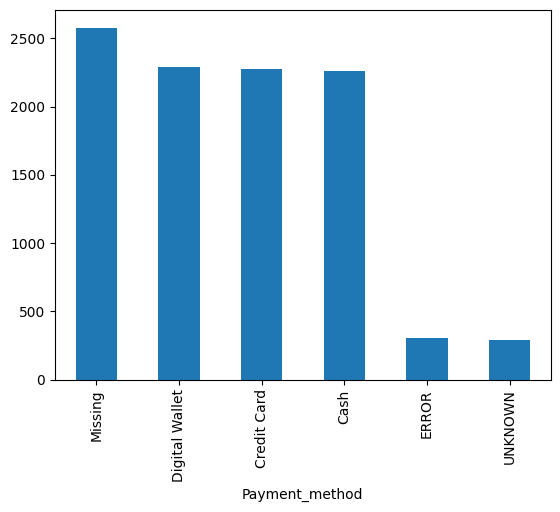

In [117]:
data.Payment_method.value_counts().plot(kind='bar')
plt.show()

In [118]:
print(data.Location.value_counts())
print(data.Location.isnull().sum())

Location
Takeaway    3022
In-store    3017
ERROR        358
UNKNOWN      338
Name: count, dtype: int64
3265


In [119]:
round(data.Location.isnull().mean()*100)

33

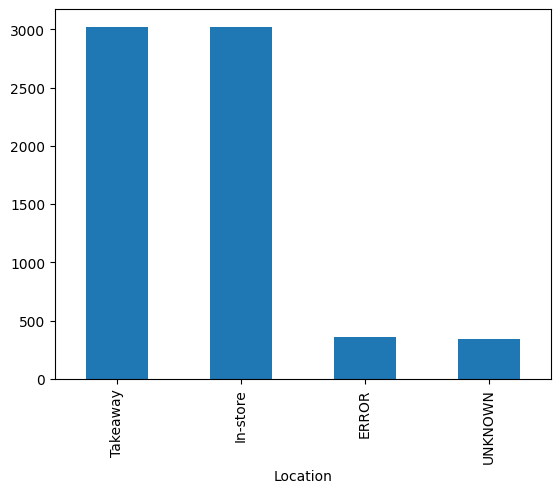

In [120]:
data.Location.value_counts().plot(kind='bar')
plt.show()

In [121]:
data[data.Location == 'UNKNOWN']

,Item,Quantity,Price_per_unit,Total_spent,Payment_method,Location,Trans_date
3,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
7,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
25,Smoothie,3,4.0,NaN,UNKNOWN,UNKNOWN,2023-12-13
35,Sandwich,1,4.0,4.0,Credit Card,UNKNOWN,2023-05-28
85,Tea,3,NaN,4.5,Cash,UNKNOWN,2023-10-29
...,...,...,...,...,...,...,...
9910,ERROR,2,3.0,6.0,Digital Wallet,UNKNOWN,2023-01-12
9913,Tea,1,1.5,1.5,Credit Card,UNKNOWN,2023-12-13
9931,Smoothie,2,4.0,8.0,Missing,UNKNOWN,NaN
9985,Cake,2,3.0,6.0,Missing,UNKNOWN,2023-01-03


In [122]:
data.Location.fillna('Missing',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13308\319771278.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Location.fillna('Missing',inplace=True)


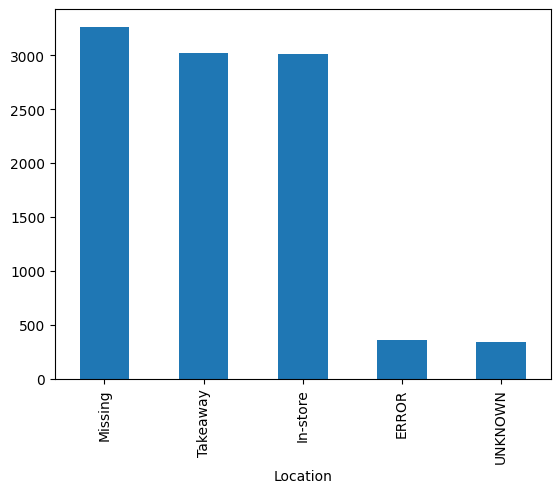

In [123]:
data.Location.value_counts().plot(kind='bar')
plt.show()

In [124]:
data.Item.isnull().mean()*100 # 

3.3300000000000005

In [125]:
data.Item.unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

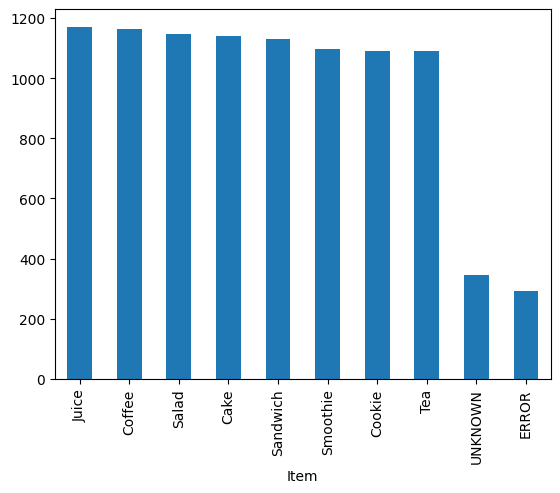

In [126]:
data.Item.value_counts().plot.bar()
plt.show()

In [127]:
data_group_item = data.groupby('Item').apply(lambda row : row['Price_per_unit'].mode()).reset_index()

C:\Users\hp\AppData\Local\Temp\ipykernel_13308\1552470555.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_group_item = data.groupby('Item').apply(lambda row : row['Price_per_unit'].mode()).reset_index()


In [128]:
data_group_item.columns = ['Item','Price']

In [129]:
dict_data_price = data_group_item.set_index('Item')['Price'].to_dict()

In [130]:
dict_data_price

{'Cake': '3.0',
 'Coffee': '2.0',
 'Cookie': '1.0',
 'ERROR': '3.0',
 'Juice': '3.0',
 'Salad': '5.0',
 'Sandwich': '4.0',
 'Smoothie': '4.0',
 'Tea': '1.5',
 'UNKNOWN': '3.0'}

In [131]:
keys_to_remove = ['UNKNOWN', 'ERROR']  
for key in keys_to_remove:
    dict_data_price.pop(key, None)

In [132]:
dict_data_price.keys()

dict_keys(['Cake', 'Coffee', 'Cookie', 'Juice', 'Salad', 'Sandwich', 'Smoothie', 'Tea'])

In [133]:
dict_data_price

{'Cake': '3.0',
 'Coffee': '2.0',
 'Cookie': '1.0',
 'Juice': '3.0',
 'Salad': '5.0',
 'Sandwich': '4.0',
 'Smoothie': '4.0',
 'Tea': '1.5'}

In [134]:
for i in range(len(data)):
    Quant = data.loc[i,'Quantity']
    Spent = data.loc[i,'Total_spent']
    if pd.notna(Quant) and pd.notna(Spent):
        if Quant not in ['ERROR','UNKNOWN'] and Spent not in ['ERROR','UNKNOWN'] :
            Spent = pd.to_numeric(Spent)
            Quant = pd.to_numeric(Quant)
            data.loc[i,'Price_per_unit'] = int(Spent)/int(Quant)
    else:
        continue

In [135]:
data[data.Item == 'Tea']

,Item,Quantity,Price_per_unit,Total_spent,Payment_method,Location,Trans_date
42,Tea,2,1.5,UNKNOWN,Missing,Takeaway,2023-01-10
70,Tea,2,1.5,3.0,Cash,In-store,2023-03-22
78,Tea,5,1.4,7.5,Cash,Missing,2023-06-02
85,Tea,3,1.333333,4.5,Cash,UNKNOWN,2023-10-29
90,Tea,2,1.5,3.0,Credit Card,In-store,2023-08-16
...,...,...,...,...,...,...,...
9961,Tea,2,1.5,3.0,Cash,Missing,2023-12-29
9965,Tea,2,1.5,3.0,Digital Wallet,Missing,2023-12-20
9974,Tea,4,1.5,6.0,Cash,In-store,2023-04-01
9978,Tea,3,1.333333,4.5,Missing,Missing,2023-02-16


In [136]:
# Total Spent :
list_invalid = ['UNKNOWN','ERROR']
for i in range(len(data)):
    Quant = data.loc[i,'Quantity']
    Price = data.loc[i,'Price_per_unit']
    if pd.isna(data.loc[i,'Total_spent']) and pd.notna(Quant) and pd.notna(Price):
        if Quant not in list_invalid and Price not in list_invalid:
            Quant = pd.to_numeric(Quant)
            Price = pd.to_numeric(Price)
            data.loc[i,'Total_spent'] = int(Quant) * int(Price)

In [137]:
data[data.Item == 'Tea']

,Item,Quantity,Price_per_unit,Total_spent,Payment_method,Location,Trans_date
42,Tea,2,1.5,UNKNOWN,Missing,Takeaway,2023-01-10
70,Tea,2,1.5,3.0,Cash,In-store,2023-03-22
78,Tea,5,1.4,7.5,Cash,Missing,2023-06-02
85,Tea,3,1.333333,4.5,Cash,UNKNOWN,2023-10-29
90,Tea,2,1.5,3.0,Credit Card,In-store,2023-08-16
...,...,...,...,...,...,...,...
9961,Tea,2,1.5,3.0,Cash,Missing,2023-12-29
9965,Tea,2,1.5,3.0,Digital Wallet,Missing,2023-12-20
9974,Tea,4,1.5,6.0,Cash,In-store,2023-04-01
9978,Tea,3,1.333333,4.5,Missing,Missing,2023-02-16


In [138]:
data.isnull().sum()

Item              333
Quantity          138
Price_per_unit     12
Total_spent        10
Payment_method      0
Location            0
Trans_date        159
dtype: int64

In [139]:
# Store the most frequent Item, if multiple items have same price.
dict_item_price = {}
for key, val in dict_data_price.items():
    if val in dict_item_price:
        if len(data[data.Item == key]) > len(data[data.Item == dict_item_price[val][0]]):
            dict_item_price[val].pop(0)
            dict_item_price[val].append(key)
    else:
         dict_item_price[val] = []
         dict_item_price[val].append(key)

In [140]:
dict_item_price

{'3.0': ['Juice'],
 '2.0': ['Coffee'],
 '1.0': ['Cookie'],
 '5.0': ['Salad'],
 '4.0': ['Sandwich'],
 '1.5': ['Tea']}

In [152]:
# Now we will replace all those NaNs with the most probable item based on price:
for i in range(len(data)):
    Price = data.loc[i,'Price_per_unit']
    item = data.loc[i,'Item']
    list_invalid = ['UNKNOWN','ERROR']
    if pd.notna(Price) and Price not in list_invalid and pd.isna(item):
        price_key = f"{float(Price):.1f}"
        if price_key in dict_item_price:
           data.loc[i,'Item'] = dict_item_price[str(price_key)][0]
    else:
        continue

In [153]:
data[data.Item == 'Tea']

,Item,Quantity,Price_per_unit,Total_spent,Payment_method,Location,Trans_date
42,Tea,2,1.5,UNKNOWN,Missing,Takeaway,2023-01-10
70,Tea,3.0,1.5,3.0,Cash,In-store,2023-03-22
78,Tea,7.0,1.4,7.5,Cash,Missing,2023-06-02
85,Tea,4.0,1.333333,4.5,Cash,UNKNOWN,2023-10-29
90,Tea,3.0,1.5,3.0,Credit Card,In-store,2023-08-16
...,...,...,...,...,...,...,...
9961,Tea,3.0,1.5,3.0,Cash,Missing,2023-12-29
9965,Tea,3.0,1.5,3.0,Digital Wallet,Missing,2023-12-20
9974,Tea,6.0,1.5,6.0,Cash,In-store,2023-04-01
9978,Tea,4.0,1.333333,4.5,Missing,Missing,2023-02-16


In [154]:
# Price
for i in range(len(data)):
    Price = data.loc[i,'Price_per_unit']
    Item = data.loc[i,'Item']
    list_invalid = ['UNKNOWN','ERROR']
    if pd.isna(Price) and pd.notna(Item) and Price not in list_invalid and Item not in list_invalid:
        data.loc[i,'Price_per_unit'] = dict_data_price[Item]
    else:
        continue

In [155]:
# Quantity : 
for i in range(len(data)):
    Price = data.loc[i,'Price_per_unit']
    Spent = data.loc[i,'Total_spent']
    list_invalid = ['UNKNOWN','ERROR']
    if pd.notna(Price) and pd.notna(Spent) and Price not in list_invalid and Spent not in list_invalid:
          Price = int(pd.to_numeric(Price))
          Spent = int(pd.to_numeric(Spent))
          data.loc[i,'Quantity'] = Spent/Price
    else:
        continue

In [156]:
data.isnull().sum()

Item              13
Quantity          12
Price_per_unit     2
Total_spent       10
Payment_method     0
Location           0
Trans_date         0
dtype: int64

In [150]:
data.Trans_date.fillna('Missing',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13308\1694793086.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Trans_date.fillna('Missing',inplace=True)


In [157]:
data.isnull().sum() # These are the final null values.

Item              13
Quantity          12
Price_per_unit     2
Total_spent       10
Payment_method     0
Location           0
Trans_date         0
dtype: int64

In [158]:
new_data = data.dropna()

In [159]:
len(new_data)

9967

In [160]:
len(data)

10000

In [ ]:
# %loss :
# New_data and data comparison
((len(new_data) - len(data))/len(data))*100 # 0.33% loss which is totally acceptable

-0.33

In [162]:
# so now we drop na from the original data:
data.dropna(inplace=True)

In [163]:
def convert_type(data,col):
    for i in range(len(data)):
        ele = data.iloc[i][col]  
        if ele not in ['UNKNOWN', 'ERROR']:
            data.iloc[i, data.columns.get_loc(col)] = round(float(pd.to_numeric(ele)),2)
        else:
            continue
convert_type(data,'Price_per_unit')
convert_type(data,'Quantity')
convert_type(data,'Total_spent')

In [164]:
data.to_csv('Datasets/sales.csv',index=False)